CO2 Emissions by Country

In [82]:
# Dependencies

import pandas as pd
import numpy as np
import pylab as plt
from sklearn.decomposition import PCA
from pprint import pprint
from datetime import datetime
!pip install wbdata
import wbdata
import matplotlib.pyplot as plt


In [83]:
#grab api source
wbdata.get_source(2)

2	World Development Indicators


In [84]:
#filter down to the emissions category and cind CO2 emmisions (metric tons per capita)
wbdata.search_indicators('emissions', source=2)

EN.ATM.CO2E.GF.KT   	CO2 emissions from gaseous fuel consumption (kt) 
EN.ATM.CO2E.GF.ZS   	CO2 emissions from gaseous fuel consumption (% of total) 
EN.ATM.CO2E.KD.GD   	CO2 emissions (kg per 2010 US$ of GDP)
EN.ATM.CO2E.KT      	CO2 emissions (kt)
EN.ATM.CO2E.LF.KT   	CO2 emissions from liquid fuel consumption (kt) 
EN.ATM.CO2E.LF.ZS   	CO2 emissions from liquid fuel consumption (% of total) 
EN.ATM.CO2E.PC      	CO2 emissions (metric tons per capita)
EN.ATM.CO2E.PP.GD   	CO2 emissions (kg per PPP $ of GDP)
EN.ATM.CO2E.PP.GD.KD	CO2 emissions (kg per 2011 PPP $ of GDP)
EN.ATM.CO2E.SF.KT   	CO2 emissions from solid fuel consumption (kt) 
EN.ATM.CO2E.SF.ZS   	CO2 emissions from solid fuel consumption (% of total)
EN.ATM.GHGO.KT.CE   	Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)
EN.ATM.GHGO.ZG      	Other greenhouse gas emissions (% change from 1990)
EN.ATM.GHGT.KT.CE   	Total greenhouse gas emissions (kt of CO2 equivalent)
EN.ATM.GHGT.ZG     

In [85]:
#filter down the data using the code for the "CO2 Emissions (metric ton per capita)
co2_pc = wbdata.get_indicator('EN.ATM.CO2E.PC', display=False)
pprint(co2_pc)

[{'id': 'EN.ATM.CO2E.PC',
  'name': 'CO2 emissions (metric tons per capita)',
  'source': {'id': '2', 'value': 'World Development Indicators'},
  'sourceNote': 'Carbon dioxide emissions are those stemming from the burning '
                'of fossil fuels and the manufacture of cement. They include '
                'carbon dioxide produced during consumption of solid, liquid, '
                'and gas fuels and gas flaring.',
  'sourceOrganization': 'Carbon Dioxide Information Analysis Center, '
                        'Environmental Sciences Division, Oak Ridge National '
                        'Laboratory, Tennessee, United States.',
  'topics': [{'id': '19', 'value': 'Climate Change'},
             {'id': '6', 'value': 'Environment '}]}]


In [86]:
#pull the country codes for each country we want to analyze
country_codes = []

country_codes.append(wbdata.search_countries("United States"))
country_codes.append(wbdata.search_countries("United Kingdom"))
country_codes.append(wbdata.search_countries("Japan"))
country_codes.append(wbdata.search_countries("Mexico"))
country_codes.append(wbdata.search_countries("India"))
country_codes.append(wbdata.search_countries("China"))



USA	United States
GBR	United Kingdom
JPN	Japan
MEX	Mexico
IND	India
CHN	China
HKG	Hong Kong SAR, China
MAC	Macao SAR, China
TWN	Taiwan, China


In [87]:
#find data between 1960 and 2015
import datetime
data_dates = (datetime.datetime(1960,1,1), datetime.datetime(2015,1,1))

In [88]:
#pull CO2 data for the 6 countries bewteen 1960 and 2015
country_list = ["USA","GBR","JPN","MEX","IND","CHN"]
data = wbdata.get_dataframe({'EN.ATM.CO2E.PC':'values'}, 
                            country=country_list, 
                            data_date=data_dates, 
                            convert_date=False, keep_levels=True)

data = data.reset_index()
data.head()

,country,date,values
0,China,2015,NaN
1,China,2014,7.543908
2,China,2013,7.557211
3,China,2012,7.424751
4,China,2011,7.241515


In [89]:
#create indvidual data frames for each country and format so it's usaable in line graph
chn_df = pd.DataFrame(data[data["country"]=="China"])
chn_df = chn_df.sort_values(by="date",ascending=True)
chn_df.set_index("date", drop=True, inplace=True)
chn_df = chn_df[["values"]]
chn_df = chn_df.rename(columns={"values":"China"})

mex_df = pd.DataFrame(data[data["country"]=="Mexico"])
mex_df = mex_df.sort_values(by="date",ascending=True)
mex_df.set_index("date", drop=True, inplace=True)
mex_df = mex_df[["values"]]
mex_df = mex_df.rename(columns={"values":"Mexico"})

ind_df = pd.DataFrame(data[data["country"]=="India"])
ind_df = ind_df.sort_values(by="date",ascending=True)
ind_df.set_index("date", drop=True, inplace=True)
ind_df = ind_df[["values"]]
ind_df = ind_df.rename(columns={"values":"India"})

usa_df = pd.DataFrame(data[data["country"]=="United States"])
usa_df = usa_df.sort_values(by="date",ascending=True)
usa_df.set_index("date", drop=True, inplace=True)
usa_df = usa_df[["values"]]
usa_df = usa_df.rename(columns={"values":"United States"})

gpb_df = pd.DataFrame(data[data["country"]=="United Kingdom"])
gpb_df = gpb_df.sort_values(by="date",ascending=True)
gpb_df.set_index("date", drop=True, inplace=True)
gpb_df = gpb_df[["values"]]
gpb_df = gpb_df.rename(columns={"values":"United Kingdom"})

jpn_df = pd.DataFrame(data[data["country"]=="Japan"])
jpn_df = jpn_df.sort_values(by="date",ascending=True)
jpn_df.set_index("date", drop=True, inplace=True)
jpn_df = jpn_df[["values"]]
jpn_df = jpn_df.rename(columns={"values":"Japan"})

chn_df.head()

,China
date,
1960,1.170381
1961,0.836047
1962,0.661428
1963,0.640002
1964,0.625646


In [90]:
#merge DataFrames
country_df = pd.merge(chn_df,mex_df, on="date",how="outer")

country_df = pd.merge(country_df,ind_df, on="date",how="outer")

country_df = pd.merge(country_df,usa_df, on="date",how="outer")

country_df = pd.merge(country_df,gpb_df, on="date",how="outer")

country_df = pd.merge(country_df,jpn_df, on="date",how="outer")

country_df.head()


,China,Mexico,India,United States,United Kingdom,Japan
date,,,,,,
1960,1.170381,1.670990,0.267634,15.999779,11.150759,2.516538
1961,0.836047,1.675961,0.283704,15.681256,11.154139,2.981979
1962,0.661428,1.587485,0.305851,16.013937,11.142928,3.059736
1963,0.640002,1.600528,0.321795,16.482762,11.254853,3.359321
1964,0.625646,1.736658,0.308169,16.968119,11.265839,3.673035


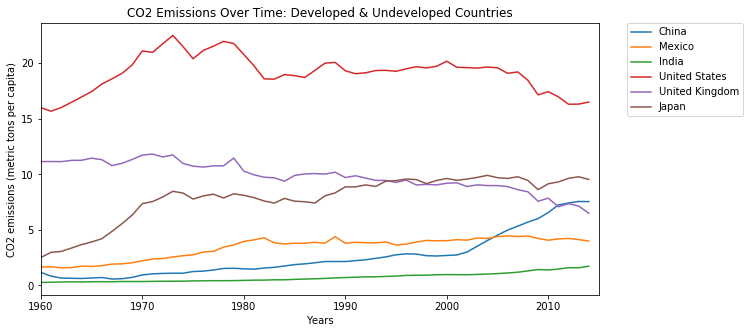

In [91]:
country_df.plot(figsize=(10,5), legend="upper right")
plt.title("CO2 Emissions Over Time: Developed & Undeveloped Countries")
plt.xlabel("Years")
plt.ylabel("CO2 emissions (metric tons per capita)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


GDP by Country

In [92]:
#grab api source
wbdata.get_source(2)

2	World Development Indicators


In [93]:
#filter down to the GDP category and find "GDP per capita (current US$)"
wbdata.search_indicators('gdp', source=2)

BG.GSR.NFSV.GD.ZS   	Trade in services (% of GDP)
BM.KLT.DINV.WD.GD.ZS	Foreign direct investment, net outflows (% of GDP)
BN.CAB.XOKA.GD.ZS   	Current account balance (% of GDP)
BX.KLT.DINV.WD.GD.ZS	Foreign direct investment, net inflows (% of GDP)
BX.TRF.PWKR.DT.GD.ZS	Personal remittances, received (% of GDP)
CM.MKT.LCAP.GD.ZS   	Market capitalization of listed domestic companies (% of GDP)
CM.MKT.TRAD.GD.ZS   	Stocks traded, total value (% of GDP)
EG.EGY.PRIM.PP.KD   	Energy intensity level of primary energy (MJ/$2011 PPP GDP)
EG.GDP.PUSE.KO.PP   	GDP per unit of energy use (PPP $ per kg of oil equivalent)
EG.GDP.PUSE.KO.PP.KD	GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent)
EG.USE.COMM.GD.PP.KD	Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)
EN.ATM.CO2E.KD.GD   	CO2 emissions (kg per 2010 US$ of GDP)
EN.ATM.CO2E.PP.GD   	CO2 emissions (kg per PPP $ of GDP)
EN.ATM.CO2E.PP.GD.KD	CO2 emissions (kg per 2011 PPP $ of GDP)
ER.GDP.FWTL.M3.KD   

In [94]:
#filter down the data using the code for the "GDP per capita (current US$)""
gdp_pc = wbdata.get_indicator('NY.GDP.PCAP.CD', display=False)
pprint(gdp_pc)

[{'id': 'NY.GDP.PCAP.CD',
  'name': 'GDP per capita (current US$)',
  'source': {'id': '2', 'value': 'World Development Indicators'},
  'sourceNote': 'GDP per capita is gross domestic product divided by midyear '
                'population. GDP is the sum of gross value added by all '
                'resident producers in the economy plus any product taxes and '
                'minus any subsidies not included in the value of the '
                'products. It is calculated without making deductions for '
                'depreciation of fabricated assets or for depletion and '
                'degradation of natural resources. Data are in current U.S. '
                'dollars.',
  'sourceOrganization': 'World Bank national accounts data, and OECD National '
                        'Accounts data files.',
  'topics': [{'id': '3', 'value': 'Economy & Growth'}]}]


In [95]:
#pull GDP data for the 6 countries between 1960 and 2015
country_list = ["USA","GBR","JPN","MEX","IND","CHN"]
gdp_data = wbdata.get_dataframe({'NY.GDP.PCAP.CD':'values'}, 
                            country=country_list, 
                            data_date=data_dates, 
                            convert_date=False, keep_levels=True)

gdp_data = gdp_data.reset_index()
gdp_data.head()

,country,date,values
0,China,2015,8033.388043
1,China,2014,7651.366044
2,China,2013,7050.645920
3,China,2012,6316.918863
4,China,2011,5618.132491


In [96]:
#create indvidual data frames for each country and format so it's usaable in line graph for gdp
gdp_chn_df = pd.DataFrame(gdp_data[gdp_data["country"]=="China"])
gdp_chn_df = gdp_chn_df.sort_values(by="date",ascending=True)
gdp_chn_df.set_index("date", drop=True, inplace=True)
gdp_chn_df = gdp_chn_df[["values"]]
gdp_chn_df = gdp_chn_df.rename(columns={"values":"China"})

gdp_mex_df = pd.DataFrame(gdp_data[gdp_data["country"]=="Mexico"])
gdp_mex_df = gdp_mex_df.sort_values(by="date",ascending=True)
gdp_mex_df.set_index("date", drop=True, inplace=True)
gdp_mex_df = gdp_mex_df[["values"]]
gdp_mex_df = gdp_mex_df.rename(columns={"values":"Mexico"})

gdp_ind_df = pd.DataFrame(gdp_data[gdp_data["country"]=="India"])
gdp_ind_df = gdp_ind_df.sort_values(by="date",ascending=True)
gdp_ind_df.set_index("date", drop=True, inplace=True)
gdp_ind_df = gdp_ind_df[["values"]]
gdp_ind_df = gdp_ind_df.rename(columns={"values":"India"})

gdp_usa_df = pd.DataFrame(gdp_data[gdp_data["country"]=="United States"])
gdp_usa_df = gdp_usa_df.sort_values(by="date",ascending=True)
gdp_usa_df.set_index("date", drop=True, inplace=True)
gdp_usa_df = gdp_usa_df[["values"]]
gdp_usa_df = gdp_usa_df.rename(columns={"values":"United States"})

gdp_gpb_df = pd.DataFrame(gdp_data[gdp_data["country"]=="United Kingdom"])
gdp_gpb_df = gdp_gpb_df.sort_values(by="date",ascending=True)
gdp_gpb_df.set_index("date", drop=True, inplace=True)
gdp_gpb_df = gdp_gpb_df[["values"]]
gdp_gpb_df = gdp_gpb_df.rename(columns={"values":"United Kingdom"})

gdp_jpn_df = pd.DataFrame(gdp_data[gdp_data["country"]=="Japan"])
gdp_jpn_df = gdp_jpn_df.sort_values(by="date",ascending=True)
gdp_jpn_df.set_index("date", drop=True, inplace=True)
gdp_jpn_df = gdp_jpn_df[["values"]]
gdp_jpn_df = gdp_jpn_df.rename(columns={"values":"Japan"})

gdp_chn_df.head()

,China
date,
1960,89.520542
1961,75.805838
1962,70.909412
1963,74.313643
1964,85.498555


In [97]:
#merge DataFrames for the gdp data
gdp_country_df = pd.merge(gdp_chn_df,gdp_mex_df, on="date",how="outer")

gdp_country_df = pd.merge(gdp_country_df,gdp_ind_df, on="date",how="outer")

gdp_country_df = pd.merge(gdp_country_df,gdp_usa_df, on="date",how="outer")

gdp_country_df = pd.merge(gdp_country_df,gdp_gpb_df, on="date",how="outer")

gdp_country_df = pd.merge(gdp_country_df,gdp_jpn_df, on="date",how="outer")

gdp_country_df.head()


,China,Mexico,India,United States,United Kingdom,Japan
date,,,,,,
1960,89.520542,345.230559,82.188602,3007.123445,1397.594803,478.995340
1961,75.805838,363.393206,85.354301,3066.562869,1472.385714,563.586760
1962,70.909412,378.153486,89.881757,3243.843078,1525.775853,633.640315
1963,74.313643,409.045610,101.126428,3374.515171,1613.456884,717.866915
1964,85.498555,469.476115,115.537497,3573.941185,1748.288118,835.657252


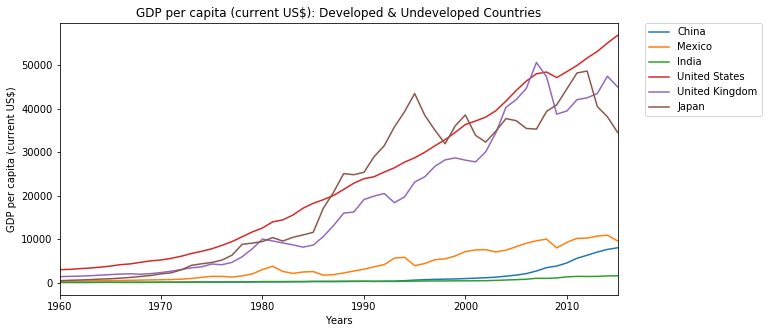

In [100]:
#create the GDP graph
gdp_country_df.plot(figsize=(10,5), legend="upper right")
plt.title("GDP per capita (current US$): Developed & Undeveloped Countries")
plt.xlabel("Years")
plt.ylabel("GDP per capita (current US$)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

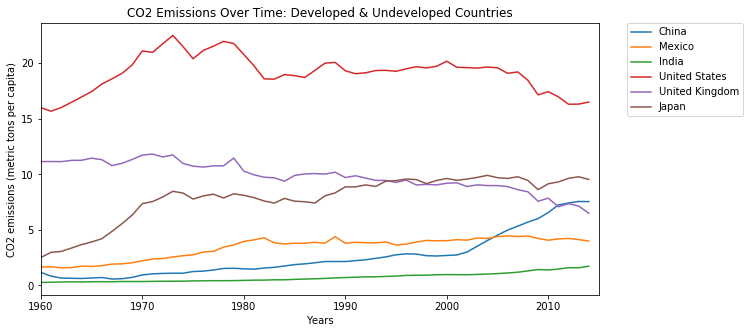

In [101]:
country_df.plot(figsize=(10,5), legend="upper right")
plt.title("CO2 Emissions Over Time: Developed & Undeveloped Countries")
plt.xlabel("Years")
plt.ylabel("CO2 emissions (metric tons per capita)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)